# 1 Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 2 defining path and import dataset

In [15]:
# Path and Setup
path = r'/Users/carlo/documents/03_08_22_project_6/'

In [16]:
# Importing dataset

# importing rent data
df_immo2 = pd.read_csv(os.path.join(path, 'data', 'Modified Data', 'immo_cleaned2.csv'), index_col = False)

# 3 Exploring DataSet

In [17]:
df_immo2.shape

(179770, 24)

In [18]:
df_immo2.columns

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'heatingType', 'newlyConst',
       'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'geo_bln',
       'cellar', 'livingSpace', 'geo_krs', 'condition', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'noRoomsRange',
       'regio2', 'numberOfYear', 'Pricepm2', 'additioncost'],
      dtype='object')

In [19]:
df_immo2.describe()

,Unnamed: 0,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,geo_plz,noRooms,noRoomsRange,numberOfYear,Pricepm2,additioncost
count,179770.000000,178117.00000,179770.000000,179770.000000,179770.000000,179770.000000,179770.000000,179770.000000,179770.000000,179770.000000,1.797650e+05,179770.000000
mean,134025.587167,145.56906,763.638309,1965.595071,70.965528,3.617400,35429.450626,2.589332,2.540674,56.404929,inf,166.018228
std,77578.092449,74.00186,416.991114,34.482667,27.420886,2.118382,27685.180905,0.919509,0.903646,34.482667,NaN,78.850633
min,0.000000,0.00000,0.000000,1861.000000,0.000000,1.000000,852.000000,1.000000,1.000000,1.000000,0.000000e+00,-650.520000
25%,66866.250000,95.00000,463.000000,1950.000000,54.000000,2.000000,9112.000000,2.000000,2.000000,30.000000,5.521886e+00,120.000000
50%,133707.500000,134.00000,630.000000,1964.000000,66.000000,3.000000,35415.000000,3.000000,3.000000,58.000000,7.166667e+00,150.000000
75%,201174.750000,180.00000,950.000000,1992.000000,84.000000,5.000000,53179.000000,3.000000,3.000000,72.000000,1.000000e+01,200.000000
max,268847.000000,1164.19000,3000.000000,2021.000000,364.000000,9.000000,99994.000000,6.000000,5.000000,161.000000,inf,984.000000


In [20]:
df_immo2.dtypes

Unnamed: 0           int64
regio1              object
serviceCharge      float64
heatingType         object
newlyConst            bool
balcony               bool
totalRent          float64
yearConstructed    float64
hasKitchen            bool
geo_bln             object
cellar                bool
livingSpace        float64
geo_krs             object
condition           object
lift                  bool
baseRentRange        int64
typeOfFlat          object
geo_plz              int64
noRooms            float64
noRoomsRange         int64
regio2              object
numberOfYear       float64
Pricepm2           float64
additioncost       float64
dtype: object

In [21]:
df_immo2.isnull().sum()

Unnamed: 0            0
regio1                0
serviceCharge      1653
heatingType           0
newlyConst            0
balcony               0
totalRent             0
yearConstructed       0
hasKitchen            0
geo_bln               0
cellar                0
livingSpace           0
geo_krs               0
condition             0
lift                  0
baseRentRange         0
typeOfFlat            0
geo_plz               0
noRooms               0
noRoomsRange          0
regio2                0
numberOfYear          0
Pricepm2              5
additioncost          0
dtype: int64

In [22]:
df_immo2.head()

,Unnamed: 0,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,...,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,regio2,numberOfYear,Pricepm2,additioncost
0,0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,...,False,4,ground_floor,44269,4.0,4,Dortmund,57.0,6.918605,245.0
1,2,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,...,True,6,apartment,1097,3.0,3,Dresden,3.0,11.515513,335.0
2,4,Bremen,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,...,False,5,apartment,28213,3.0,3,Bremen,72.0,9.003178,138.0
3,6,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,Sachsen,...,False,2,apartment,9599,2.0,2,Mittelsachsen_Kreis,64.0,5.000000,70.0
4,8,Baden_Württemberg,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_Württemberg,...,False,4,roof_storey,79211,2.0,2,Emmendingen_Kreis,52.0,10.943396,110.0


# 4 Checking Extreme Values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalRent', ylabel='Density'>

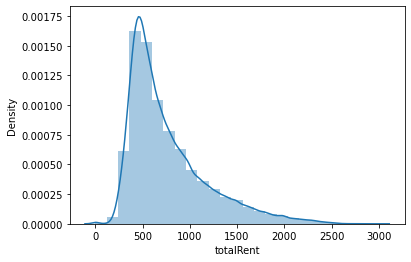

In [23]:
# checking for total rent cost
sns.distplot(df_immo2['totalRent'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingSpace', ylabel='Density'>

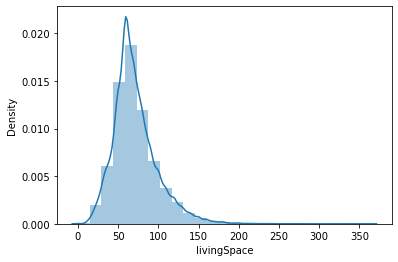

In [24]:
# Checking for living space
sns.distplot(df_immo2['livingSpace'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serviceCharge', ylabel='Density'>

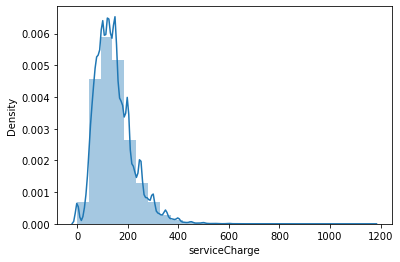

In [25]:
#checking for cost of service (heating + ebergy + water)
sns.distplot(df_immo2['serviceCharge'], bins=25)

In [26]:
# describing key variables
df_immo2[['totalRent', 'livingSpace', 'serviceCharge', 'Pricepm2']].describe()

,totalRent,livingSpace,serviceCharge,Pricepm2
count,179770.000000,179770.000000,178117.00000,1.797650e+05
mean,763.638309,70.965528,145.56906,inf
std,416.991114,27.420886,74.00186,NaN
min,0.000000,0.000000,0.00000,0.000000e+00
25%,463.000000,54.000000,95.00000,5.521886e+00
50%,630.000000,66.000000,134.00000,7.166667e+00
75%,950.000000,84.000000,180.00000,1.000000e+01
max,3000.000000,364.000000,1164.19000,inf


# 5 preparing data for regression analysis

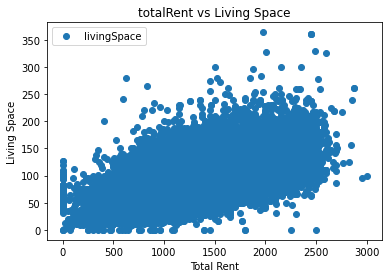

In [27]:
# Creating a scatterplot to looking for variables' relationship to be tested
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_immo2.plot(x = 'totalRent', y='livingSpace',style='o')
plt.title('totalRent vs Living Space')  
plt.xlabel('Total Rent')  
plt.ylabel('Living Space')  
plt.show()

# 6 Reshaping the variables

In [28]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_immo2['totalRent'].values.reshape(-1,1)
y = df_immo2['livingSpace'].values.reshape(-1,1)

In [29]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 7 Regression Analysis

In [30]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train) # training the model

LinearRegression()

In [32]:
# Predict the values of y using X.
# Using the model on the test data set to predict some y values and see how accurate they are.

y_predicted = regression.predict(X_test) 

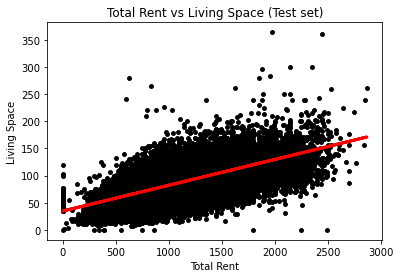

In [33]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Rent vs Living Space (Test set)')
plot_test.xlabel('Total Rent')
plot_test.ylabel('Living Space')
plot_test.show()

In [34]:
# Checking the accuracy of the model - mean squared error and R2.
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Printing the model's summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04752832]]
Mean squared error:  358.40920634904097
R2 score:  0.525199213397465


# The slope coefficient indicates how the y variable changes when X changes.

# The root mean squared error (MSE) is an estimator that measures the average  of the squared difference between the estimated values and the true values. It  states how close a regression line is to a set of points. A small MSE means that  the regression line passes fairly close to the observations, making it a good fit.  I would interpret the result moderate to high MSE, so the linear regression line  is not a fairly good fit for this analysis.

# The R2 score or R squared is a metric that shows how well the model explains the variance in the data. It’s a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. I would interpret the result as the fit is average, it is not close to 1 but is not close to 0 either.

In [36]:
# Making a dataframe of y values and their predicted values to further see the performance of the model 

y_predicted

array([[61.73316811],
       [77.67891955],
       [85.04580918],
       ...,
       [71.6223857 ],
       [51.53834343],
       [66.03448109]])

In [37]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,58.92,61.733168
1,88.00,77.678920
2,102.00,85.045809
3,80.00,65.083915
4,94.00,62.707499
5,57.73,51.942334
6,60.00,59.855799
7,32.00,47.973719
8,58.36,52.840619
9,59.28,59.459413


# This output shows there is some differences between the actual and predicted values.

# This evidence that the model does not explain with a high level of accuracy the relationship between the “Total Rent' and the 'Living Space” variables.

# The relationship doesn’t follow a straight regression line, perhaps further analysis should be indicated to analyse outliers or other variables.**

In [38]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
# Checking the accuracy of the model.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
# Printing the model's statistics results. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04752832]]
Mean squared error:  359.4386709248263
R2 score:  0.5211500856007092


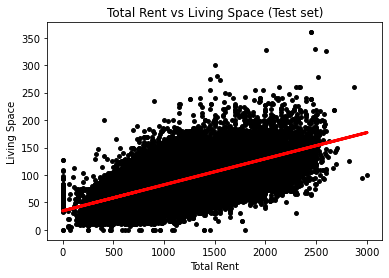

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Rent vs Living Space (Test set)')
plot_test.xlabel('Total Rent')
plot_test.ylabel('Living Space')
plot_test.show()

# 8 has any Improvement of the performance removing the extreme values?

In [42]:
# Cleaning the extreme values from the "Government Integrity" variable observed during the consistency checks.

df_test = df_immo2[df_immo2['totalRent'] <=1500] 

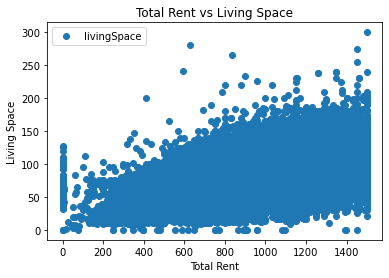

In [43]:
# Checking how the scatterplot looks without the outliers.

df_test.plot(x = 'totalRent', y='livingSpace', style='o')  
plt.title('Total Rent vs Living Space')  
plt.xlabel('Total Rent')  
plt.ylabel('Living Space')  
plt.show()

In [44]:
# Reshape again.

X_2 = df_test['totalRent'].values.reshape(-1,1)
y_2 = df_test['livingSpace'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05262124]]
Mean squared error:  309.00432778677236
R2 score:  0.4468749858806763


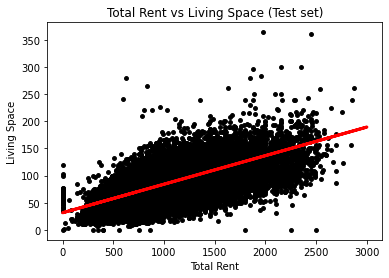

In [50]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Total Rent vs Living Space (Test set)')
plot_test.xlabel('Total Rent')
plot_test.ylabel('Living Space')
plot_test.show()

In [51]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})

In [52]:
data.head(30)

,Actual,Predicted
0,49.57,58.691572
1,104.00,77.281077
2,72.00,65.241337
3,70.00,76.028691
4,35.00,45.771479
5,55.84,58.400576
6,61.10,63.715322
7,90.00,77.344222
8,59.23,74.186948
9,60.75,55.032817


# There are some observation with high difference between the actual and predicted values, but there are others with close values. Although the scatterplot shows a good correlation between the variables, the model's statistics results show that the linear regression model doesn't seem to be a good fit